In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset 

In [30]:
df = pd.read_csv('loan_data.csv')
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

### Check for Class Imbalance 

loan_status
0    77.777778
1    22.222222
Name: proportion, dtype: float64

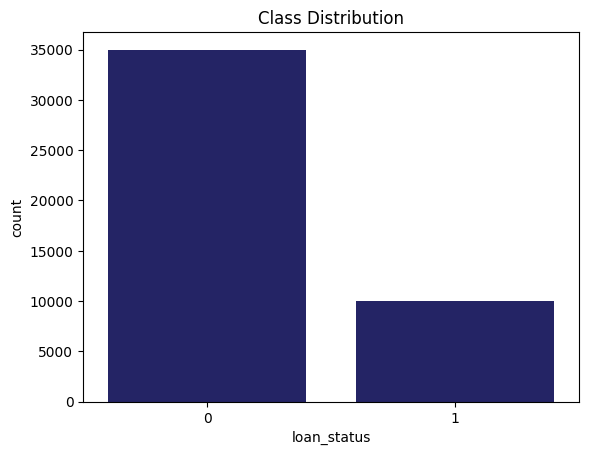

In [5]:
sns.countplot(data = df, x ='loan_status',color = 'midnightblue')
plt.title('Class Distribution')
plt.show
df['loan_status'].value_counts(normalize = True) * 100

### Checking Relations of Categorical Columns with target

loan_status           0         1
person_gender                    
female         0.777519  0.222481
male           0.777988  0.222012


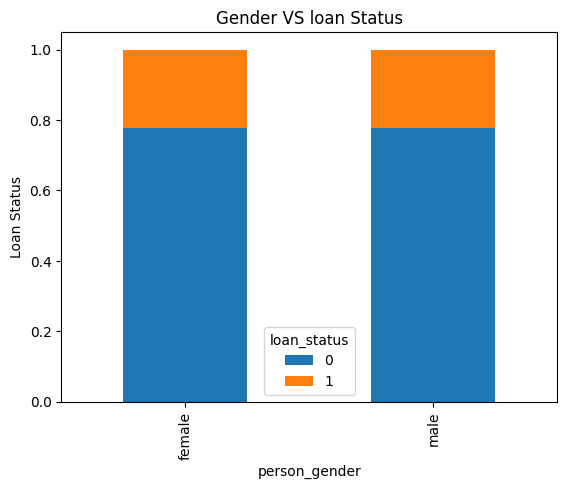

loan_status              0         1
person_education                    
Associate         0.779681  0.220319
Bachelor          0.774759  0.225241
Doctorate         0.771337  0.228663
High School       0.776896  0.223104
Master            0.782378  0.217622


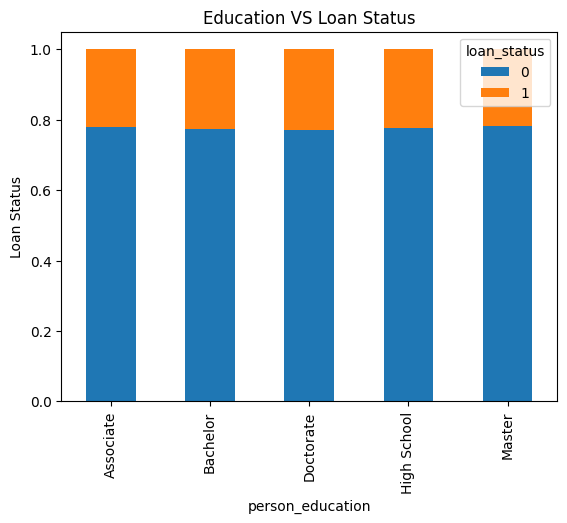

loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.884039  0.115961
OTHER                  0.666667  0.333333
OWN                    0.924771  0.075229
RENT                   0.676023  0.323977


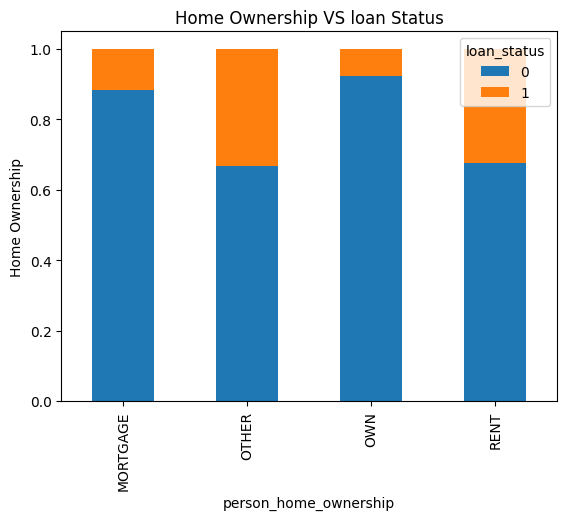

loan_status               0         1
loan_intent                          
DEBTCONSOLIDATION  0.697271  0.302729
EDUCATION          0.830438  0.169562
HOMEIMPROVEMENT    0.736985  0.263015
MEDICAL            0.721806  0.278194
PERSONAL           0.798596  0.201404
VENTURE            0.855736  0.144264


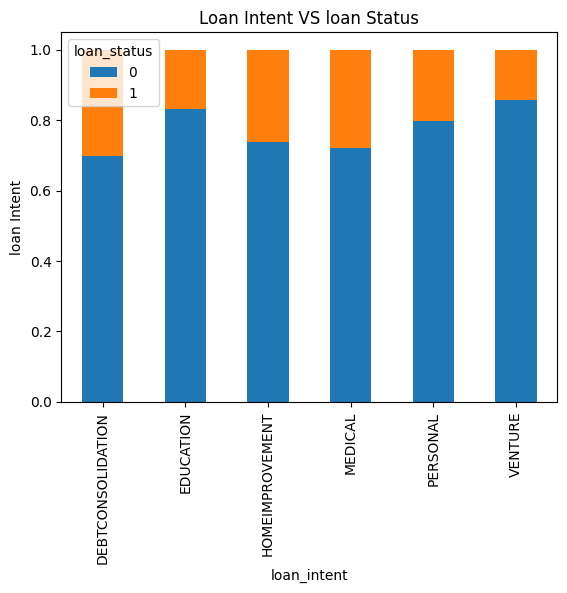

loan_status                           0        1
previous_loan_defaults_on_file                  
No                              0.54837  0.45163
Yes                             1.00000  0.00000


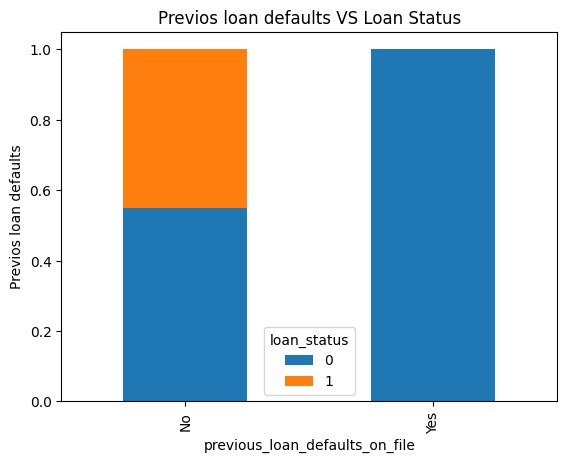

In [7]:
def Cat_val_vs_target():
    # Relationshib Between Gender and Loan Status
    ct = pd.crosstab(df['person_gender'], df['loan_status'], normalize='index')
    print(ct)

    ct.plot(kind='bar', stacked=True)
    plt.ylabel('Loan Status')
    plt.title('Gender VS loan Status')
    plt.show()
    
    # Relationship Between Education and Loan Status
    ct = pd.crosstab(df['person_education'], df['loan_status'], normalize='index')
    print(ct)

    ct.plot(kind='bar', stacked=True)
    plt.ylabel('Loan Status')
    plt.title('Education VS Loan Status')
    plt.show()
    
    # Relationshib Between Home Ownership and Loan Status
    ct = pd.crosstab(df['person_home_ownership'], df['loan_status'], normalize='index')
    print(ct)
    
    ct.plot(kind='bar', stacked=True)
    plt.ylabel('Home Ownership')
    plt.title('Home Ownership VS loan Status')
    plt.show()
    
    # Relationshib Between Loan Intent and Loan Status
    ct = pd.crosstab(df['loan_intent'], df['loan_status'], normalize='index')
    print(ct)
    
    ct.plot(kind='bar', stacked=True)
    plt.ylabel('loan Intent')
    plt.title('Loan Intent VS loan Status')
    plt.show()
    
    # Relationshib Between Previous Loan defaults and Loan Status
    ct = pd.crosstab(df['previous_loan_defaults_on_file'], df['loan_status'], normalize='index')
    print(ct)
    
    ct.plot(kind='bar', stacked=True)
    plt.ylabel('Previos loan defaults')
    plt.title('Previos loan defaults VS Loan Status')
    plt.show()

Cat_val_vs_target()


### Checking Numerical Columns Relationship with the Target

In [9]:
df.select_dtypes(include='number').columns  # Numeric Values

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status'],
      dtype='object')

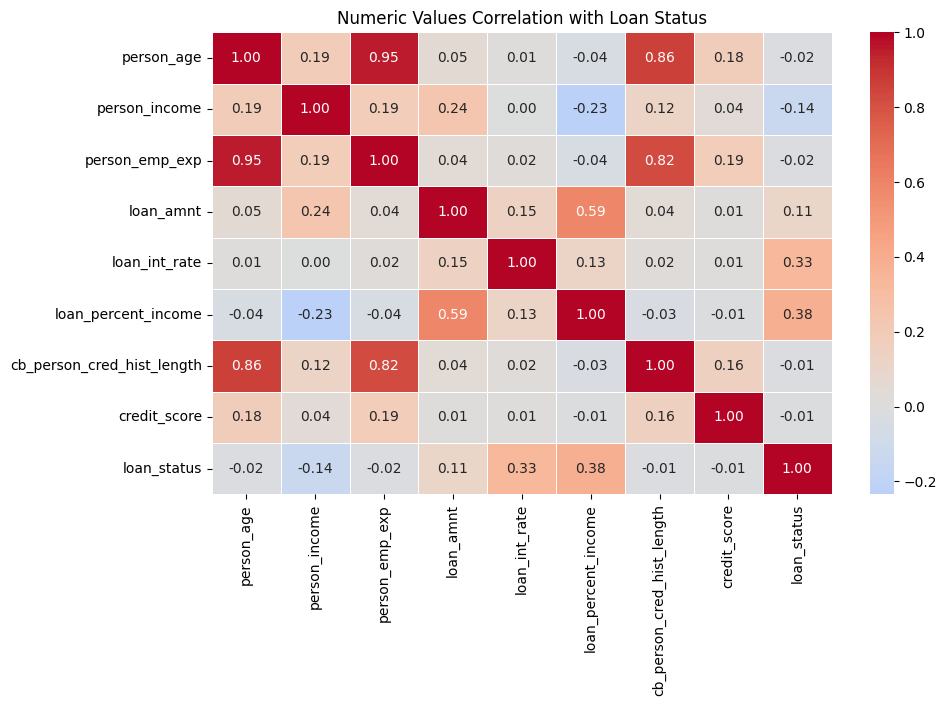

In [10]:
numeric_features  =['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score']
target = 'loan_status'
df_numeric = df[numeric_features + [target]].dropna()
corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    center=0,
    fmt=".2f",
    linewidths=0.5
)
plt.title("Numeric Values Correlation with Loan Status")
plt.show()

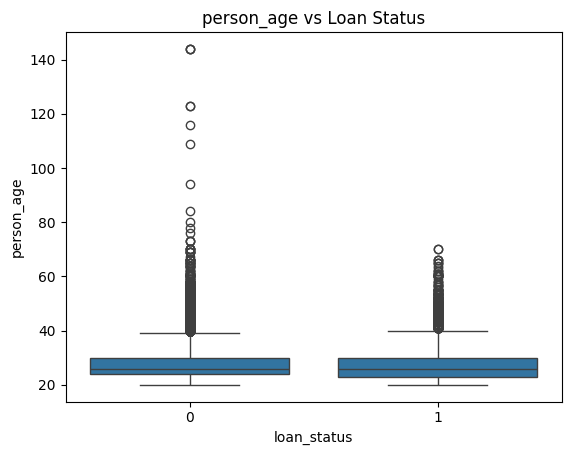

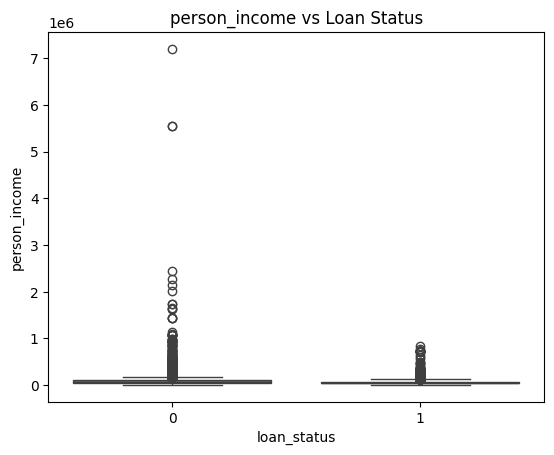

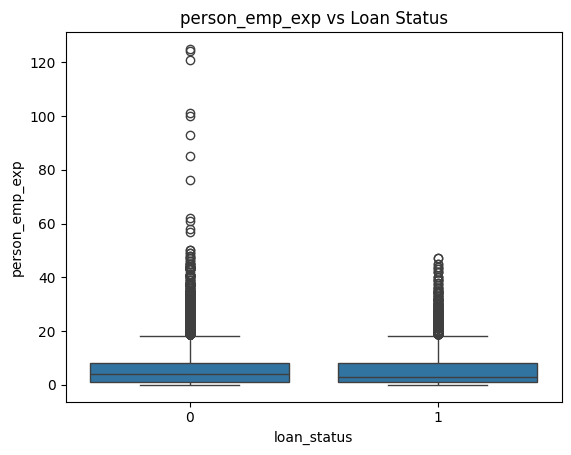

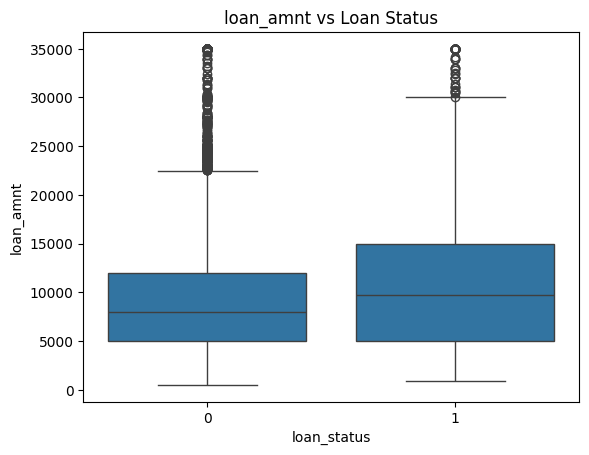

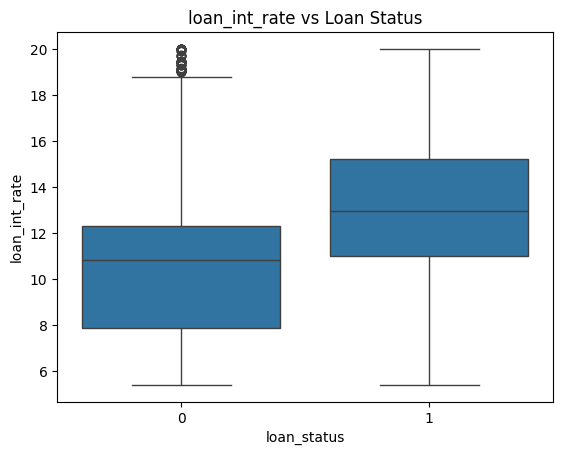

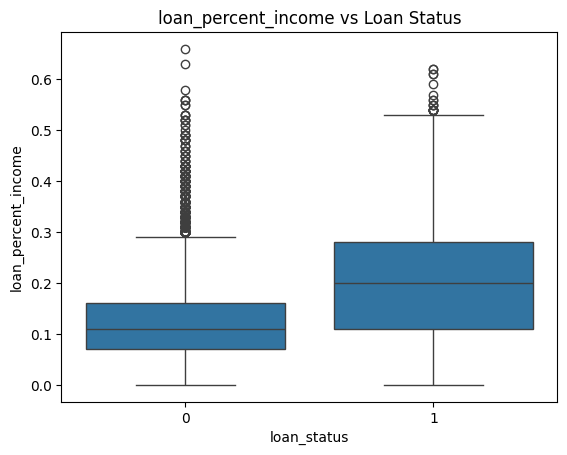

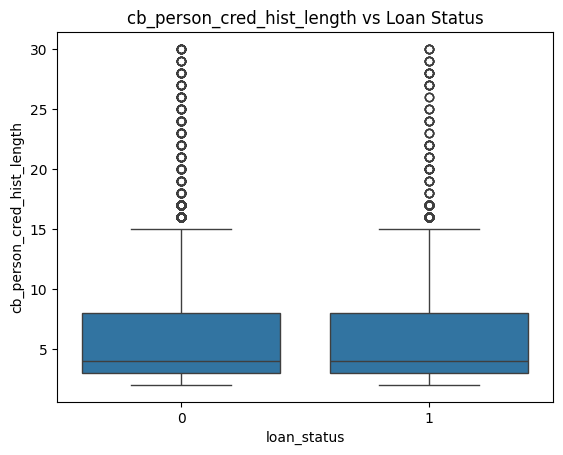

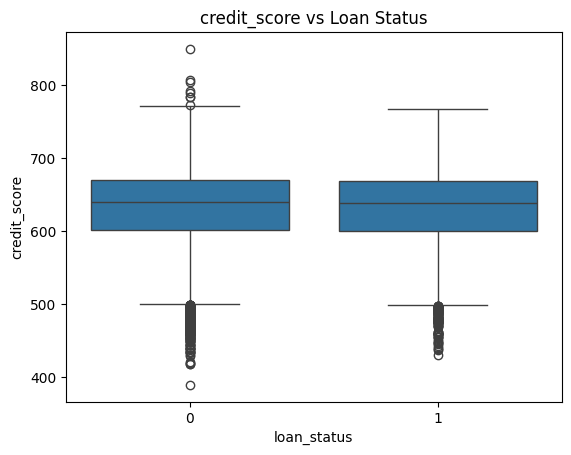

In [20]:
for col in df.select_dtypes(include='number').columns:
    if col != 'loan_status':
        sns.boxplot(x='loan_status', y=col, data=df)
        plt.title(f'{col} vs Loan Status')
        plt.show()